Code for dataloader

In [1]:
import os
from pathlib import Path
from PIL import Image
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from DatasetAndAugmentation.LowHighDataAugment import PairedTransforms
from DatasetAndAugmentation.LowHightDataset import LOLPairedDataset
import matplotlib.pyplot as plt
from model.model import Model
import torch.nn as nn

/opt/anaconda3/envs/deeplEnv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Define the dir of the dataset

In [2]:
# direction of the dataset
dataset_dir = "/path/to/dataset"
# directory of low-light images
train_low_dir = "./LOLdataset/train/low"
# directory of high-light images
train_bright_dir = "./LOLdataset/train/high"

# test
test_low_dir = "./LOLdataset/test/low"
test_bright_dir = "./LOLdataset/test/high"

# create the train/test pic transformer, dataset and dataLoader

In [3]:
# create transform class to transform the image into tensor
train_batch_size = 5
train_transform = PairedTransforms(image_size=(400, 600), train=True)
train_dataset = LOLPairedDataset(train_low_dir, train_bright_dir, transform=train_transform, train=True)
train_loader = DataLoader(train_dataset, batch_size=train_batch_size, shuffle=True)


test_transform = PairedTransforms(image_size=(400, 600), train=False)
test_dataset = LOLPairedDataset(test_low_dir, test_bright_dir, transform=train_transform, train=False)
test_loader = DataLoader(test_dataset, batch_size=1, shuffle=False)

# Initialize the model

In [4]:
model = Model() # Currently directly output the input
loss = nn.MSELoss()

# Pipline of training Process

In [5]:
for batch in train_loader:
    input_low_light = batch["low"]
    target_high_light = batch["bright"]
    predict_high_light = model(input_low_light, degree_of_brightness=-1)
    l = loss(predict_high_light, target_high_light)
    break

# Visualize the output of model

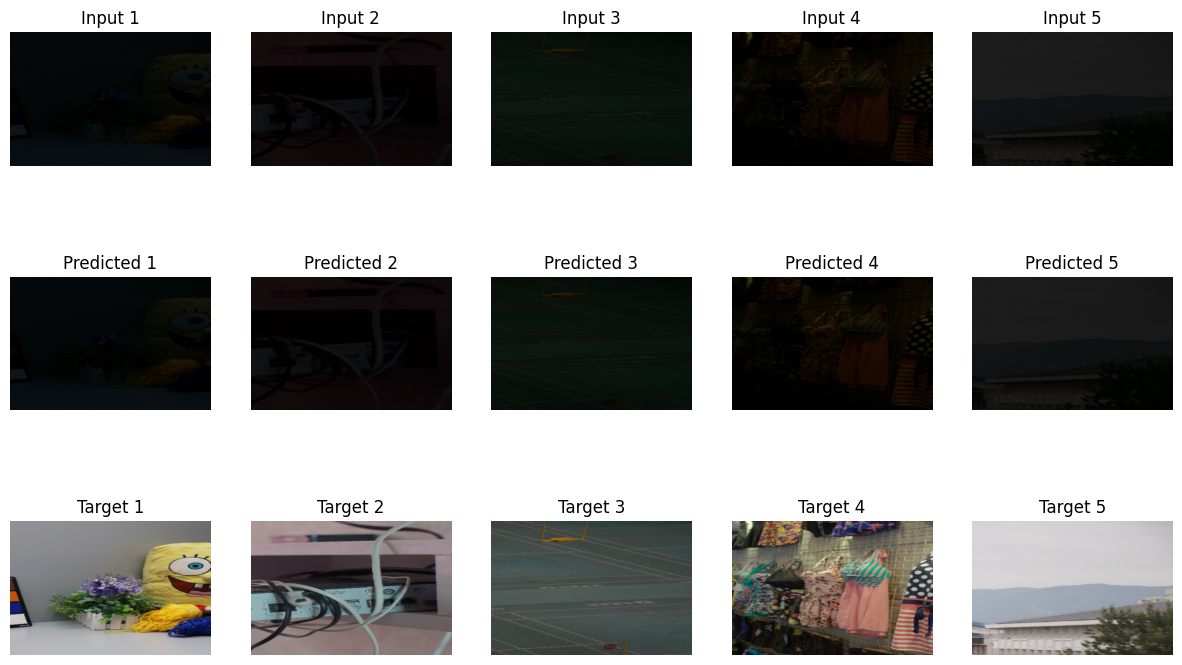

In [6]:
fig, axes = plt.subplots(3, train_batch_size, figsize=(3 * train_batch_size, 9))
for i in range(train_batch_size):
    predict_high_light_PIL, target_high_light_PIL = train_transform.tensor2PIL(predict_high_light[i,...], target_high_light[i,...])
    input_low_light_PIL, _  = train_transform.tensor2PIL(input_low_light[i,...], None)
    # 第1行: Picture input into the model
    axes[0, i].imshow(input_low_light_PIL)
    axes[0, i].set_title(f"Input {i+1}")
    axes[0, i].axis('off')

    # 第2行: Picture output from the model, augmented by the model
    axes[1, i].imshow(predict_high_light_PIL)
    axes[1, i].set_title(f"Predicted {i+1}")
    axes[1, i].axis('off')

    # 第3行：The target picture
    axes[2, i].imshow(target_high_light_PIL)
    axes[2, i].set_title(f"Target {i+1}")
    axes[2, i].axis('off')
plt.show()